In [22]:
/* export delimited ccode year openc using "sam.csv" */

In [2]:
global input = "C:\Users\Iyed\Desktop\Trade Analysis\Practical guide to TPA\Practical guide to TPA"
global export_path = "C:\Users\Iyed\Projects\trade_policy_analysis\data"

# Analyzing trade flows

## Overall openness

### Trade over GDP measures

***Open database***

In [3]:
cd "$input/Chapter1/Datasets"
use openness.dta, replace


C:\Users\Iyed\Desktop\Trade Analysis\Practical guide to TPA\Practical guide to TPA\Chapter1\Datasets



***Generate variables and logs***

In [4]:
gen gdppc = gdp_c / pop
gen ln_open = ln(openc)
gen ln_gdp = ln(gdp_current)
gen ln_gdppc = ln(gdppc)
gen ln_pop = ln(pop)
gen ln_remot = ln(remoteness)
gen ln_remot_head = ln(remoteness_head)


(122 missing values generated)

(13 missing values generated)

(122 missing values generated)

(122 missing values generated)





***Plots***

In [5]:
replace gdppc = gdppc/1000
replace ln_gdppc = ln(gdppc)


(3039 real changes made)

(3039 real changes made)


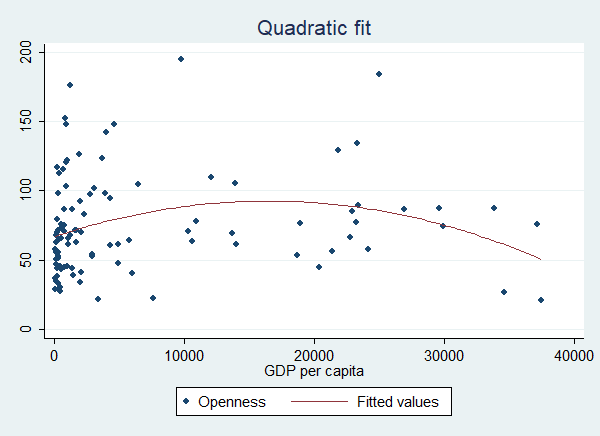

In [10]:
twoway (scatter openc gdppc) (qfit openc gdppc) if (year==2000 &openc<=200),/*
    */ title("Quadratic fit") legend(lab(1 "Openness")) /*
    */ xtitle (""GDP per capita")


C:\Users\Iyed\Desktop\Trade Analysis\Practical guide to TPA\Practical guide to TPA\Chapter1\Applications\1 comparing openness across countries\Results


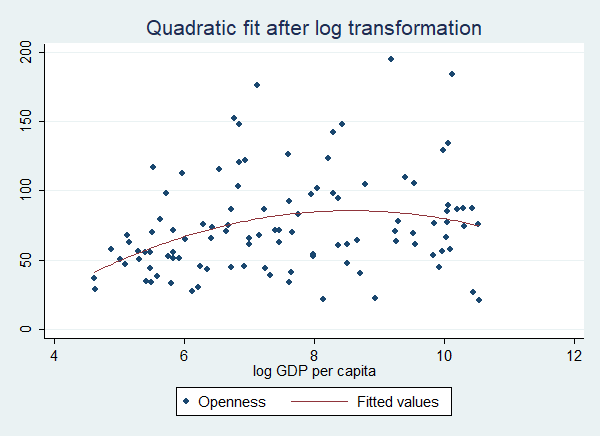

In [8]:
cd "$input/Chapter1/Applications/1 comparing openness across countries/Results"

twoway (scatter openc ln_gdppc) (qfit openc ln_gdppc) if (year==2000 &openc<=200), /*
    */ title("Quadratic fit after log transformation") /*
    */ legend(lab(1 "Openness")) xtitle (""log GDP per capita")

***Estimation of the equation***

In [25]:
%head

,ccode,year,openc,openk,pop,gdp_current,ldlock,island,remoteness,remoteness_head,gdppc,ln_open,ln_gdp,ln_gdppc,ln_pop,ln_remot,ln_remot_head
1,AGO,1976,77.27,74.59999999999999,5943.47021484375,.,0,0,6524.2007,33176170496,.,4.3473058,.,.,8.6900482,8.7832737,24.225098
2,AGO,1977,78.56999999999999,74.69,6163.7099609375,.,0,0,4004.1128,35502632960,.,4.3639898,.,.,8.7264338,8.2950773,24.292873
3,AGO,1978,77.27,73.42,6287.18017578125,.,0,0,6895.4263,48192663552,.,4.3473058,.,.,8.7462683,8.8386135,24.598473
4,AGO,1979,78.33,72.36,6452.5498046875,.,0,0,4345.3291,44150726656,.,4.3609304,.,.,8.7722311,8.3768568,24.510876
5,AGO,1980,70.37000000000001,68.90000000000001,6743.080078125,.,0,0,4385.3813,47522209792,.,4.253767,.,.,8.8162718,8.3860321,24.584463
6,AGO,1981,84.87000000000001,80.67,6879.56982421875,.,0,0,5638.4224,30825762816,.,4.4411206,.,.,8.8363113,8.6373596,24.151617
7,AGO,1982,80.26000000000001,74.22,7018.52978515625,.,0,0,6187.3418,37768687616,.,4.3852715,.,.,8.8563089,8.7302608,24.354746
8,AGO,1983,77.22,70.81999999999999,7240.52978515625,.,0,0,4068.085,44640964608,.,4.3466587,.,.,8.8874493,8.3109274,24.521917
9,AGO,1984,78.44,65.95999999999999,7442.4501953125,.,0,0,4535.5762,31148218368,.,4.3623338,.,.,8.9149551,8.4197073,24.162024
10,AGO,1985,61.65,62.08,7584.7099609375,6800000000,0,0,5882.4326,30927343616,896.54059,4.1214733,22.640188,6.7985435,8.9338894,8.6797256,24.154907


In [26]:
xi: reg ln_open ln_gdppc i.ccode, r
outreg2 using "open.xls", keep(ln_gdppc) replace

xi: reg ln_open ln_gdppc ln_pop i.ccode, r
outreg2 using "open.xls", keep(ln_gdppc ln_pop) append
est store one

xi: reg ln_open ln_gdppc ln_pop ldlock i.ccode, r
outreg2 using "open.xls", keep(ln_gdppc ln_pop ldlock) append

xi: reg ln_open ln_gdppc ln_pop ldlock i.ccode, r
outreg2 using "open.xls", keep(ln_gdppc ln_pop ldlock) append

xi: reg ln_open ln_gdppc ln_pop ldlock ln_remot_head i.ccode, r
outreg2 using "open.xls", keep(ln_gdppc ln_pop ldlock ln_remot_head) append


i.ccode           _Iccode_1-109       (_Iccode_1 for ccode==AGO omitted)
note: _Iccode_12 omitted because of collinearity

Linear regression                                      Number of obs =    3039
                                                       F(108,  2930) =  395.66
                                                       Prob > F      =  0.0000
                                                       R-squared     =  0.8389
                                                       Root MSE      =  .23544

------------------------------------------------------------------------------
             |               Robust
     ln_open |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    ln_gdppc |   .0990209   .0101057     9.80   0.000     .0792059    .1188358
   _Iccode_2 |  -.2013865   .1109598    -1.81   0.070    -.4189537    .0161806
   _Iccode_3 |  -1.837875   .1188701   -15.46   0

In [27]:
pwd

C:\Users\Iyed\Desktop\Trade Analysis\Practical guide to TPA\Practical guide to TPA\Chapter1\Applications\1 comparing openness across countries\Results


***Create dummy = 1 if observed openness > predicted, for each country/year***

In [15]:
est restore one
quietly predict fitted
g trade_more=(ln_open>fitted)
tab ccode trade_more


(results one are active now)




           |      trade_more
  iso-code |         0          1 |     Total
-----------+----------------------+----------
       AGO |        16         13 |        29 
       ARE |        16         13 |        29 
       ARG |        16         13 |        29 
       AUS |        17         12 |        29 
       AUT |        18         11 |        29 
       BDI |        12         17 |        29 
       BEN |        16         13 |        29 
       BFA |        15         14 |        29 
       BGD |        18         11 |        29 
       BOL |        19         10 |        29 
       BRA |        16         13 |        29 
       BRN |        29          0 |        29 
       BWA |        15         14 |        29 
       CAF |        15         14 |        29 
       CAN |        18         11 |        29 
       CHE |        15         14 |        29 
       CHL |        17         12 |        29 
       CHN |        11         18 |        29 

### Import content of exports and external orientation

### Trade in intermediate goods

### Offshoring

### Vertical specialization

## Trade composition

### Sectoral and geographical orientation of trade

***Open database***

In [16]:
cd "$input/Chapter1/Datasets"
use TPP.dta, clear


C:\Users\Iyed\Desktop\Trade Analysis\Practical guide to TPA\Practical guide to TPA\Chapter1\Datasets



***Main export sectors, Colombia, 1990 and 2000***

In [17]:
bysort ccode year: egen total_export=total(exp_tv)
bysort ccode year: g export_share = exp_tv / total_export
sum export_share
gsort ccode year -export_share
bysort ccode year: g ranking = (_n+1)-1



(23949 missing values generated)


    Variable |       Obs        Mean    Std. Dev.       Min        Max
-------------+--------------------------------------------------------
export_share |     57251    .0361566    .0810019          0          1




***Create rankings in various years***

In [18]:
keep ranking sector ccode year export_share
egen id=group( ccode sector)
reshape wide ranking export_share, i(id) j(year)
order sector ccode rank*




(note: j = 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004)

Data                               long   ->   wide
-----------------------------------------------------------------------------
Number of obs.                    81200   ->    2800
Number of variables                   6   ->      61
j variable (29 values)             year   ->   (dropped)
xij variables:
                                ranking   ->   ranking1976 ranking1977 ... ranking2004
                           export_share   ->   export_share1976 export_share1977 ... export_share2004
-----------------------------------------------------------------------------



***Colombia, 1990 - 2000***


(2772 observations deleted)




     +-----------------------------------------------------------------------------------------------+
     |                                    sector   ccode   ran~1990   ran~2000   exp~1990   exp~2000 |
     |-----------------------------------------------------------------------------------------------|
  1. |                      Petroleum refineries     COL          1          1   .2207589    .142733 |
  2. |                             Food products     COL          2          2   .1585488   .1279125 |
  3. |                            Iron and steel     COL          3          6   .0922305   .0614966 |
  4. |               Other manufactured products     COL          4          9   .0776382   .0360418 |
  5. |                                  Textiles     COL          5          8   .0680667   .0466166 |
     |-----------------------------------------------------------------------------------------------|
  6. |                          Leather 

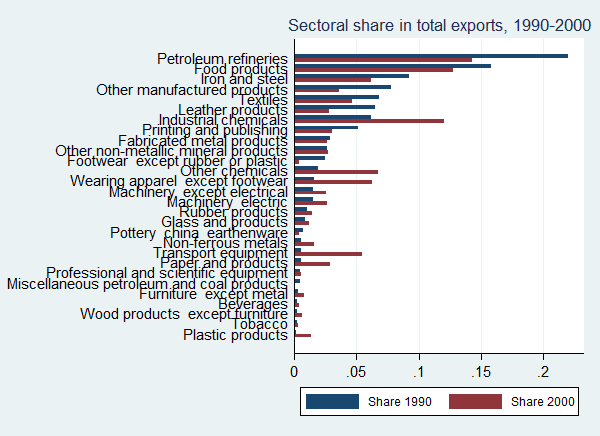

In [19]:
keep if ccode=="COL"
keep ccode sector ranking1990 ranking2000 export_share1990 export_share2000
sort  ranking1990
list
graph hbar export_share1990 export_share2000, over(sector, sort(1) descending) /*
    */ legend(rows(1) label (1 "Share 1990") label (2 "Share 2000") size (small)) /*
    */ title("Sectoral share in total exports, 1990-2000",size(medium))

***Main trade partners, Colombia (export side), 1990 and 2000***

In [20]:
cd "$input/Chapter1/Datasets"
use aBilateralTrade.dta, clear


C:\Users\Iyed\Desktop\Trade Analysis\Practical guide to TPA\Practical guide to TPA\Chapter1\Datasets



In [21]:
bysort ccode year: egen tot_exp=total(exp_tv)
bysort ccode year: g export_share = exp_tv / tot_exp
sum export_share
gsort ccode year -export_share
bysort ccode year: g ranking = (_n+1)-1



(3567 missing values generated)


    Variable |       Obs        Mean    Std. Dev.       Min        Max
-------------+--------------------------------------------------------
export_share |    399568    .0078234    .0391135          0          1




***Create rankings in various years***

In [22]:
keep ranking ccode pcode year export_share
egen id=group(ccode pcode)
reshape wide ranking export_share, i(id) j(year)
order ccode pcode rank*




(note: j = 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004)

Data                               long   ->   wide
-----------------------------------------------------------------------------
Number of obs.                   403135   ->   34131
Number of variables                   6   ->      61
j variable (29 values)             year   ->   (dropped)
xij variables:
                                ranking   ->   ranking1976 ranking1977 ... ranking2004
                           export_share   ->   export_share1976 export_share1977 ... export_share2004
-----------------------------------------------------------------------------



***Colombia 1990 - 2000***


(33899 observations deleted)




     +-----------------------------------------------------------+
     | ccode   pcode   ran~1990   ran~2000   exp~1990   exp~2000 |
     |-----------------------------------------------------------|
  1. |   COL     USA          1          1   .4577921   .2495092 |
  2. |   COL     JPN          2         17   .0633939   .0089033 |
  3. |   COL     VEN          3          2   .0618066   .2227263 |
  4. |   COL     NLD          4         27   .0581239    .005825 |
  5. |   COL     PAN          5          8   .0384624   .0285741 |
     |-----------------------------------------------------------|
  6. |   COL     PER          6          4   .0309377   .0472916 |
  7. |   COL     ECU          7          3   .0272435    .085976 |
  8. |   COL     DEU          8         25   .0233127    .006672 |
  9. |   COL     FRA          9         21   .0220972   .0071299 |
 10. |   COL     MEX         10          5   .0208323   .0402942 |
     |----------------------

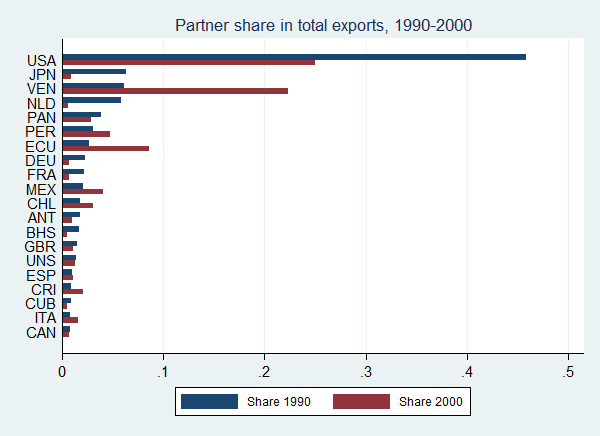

In [23]:
keep if ccode=="COL"
keep ccode pcode ranking1990 ranking2000 export_share1990 export_share2000
sort  ranking1990
list in 1/20
keep if ranking1990<=20
graph hbar export_share1990 export_share2000, over(pcode, sort(1) descending) /*
    */ legend(rows(1) label (1 "Share 1990") label (2 "Share 2000") size (small)) /*
    */ title("Partner share in total exports, 1990-2000",size(medium))

### Intra-industry trade

#### GL index for the degree of aggregation

##### Open database

In [24]:
cd "$input/Chapter1/Datasets"
use trade_6digit.dta, replace


C:\Users\Iyed\Desktop\Trade Analysis\Practical guide to TPA\Practical guide to TPA\Chapter1\Datasets



##### Create database aggregated at sectoral level *HS1 digit*

In [25]:
rename product hs6
generate section=0
replace section=1 if hs6<60000
replace section=2 if hs6>=60000 & hs6<150000
replace section=3 if hs6>=150000 & hs6<160000
replace section=4 if hs6>=160000 & hs6<250000
replace section=5 if hs6>=250000 & hs6<280000
replace section=6 if hs6>=280000 & hs6<390000
replace section=7 if hs6>=390000 & hs6<410000
replace section=8 if hs6>=410000 & hs6<440000
replace section=9 if hs6>=440000 & hs6<470000
replace section=10 if hs6>=470000 & hs6<500000
replace section=11 if hs6>=500000 & hs6<640000
replace section=12 if hs6>=640000 & hs6<680000
replace section=13 if hs6>=680000 & hs6<710000
replace section=14 if hs6>=710000 & hs6<720000
replace section=15 if hs6>=720000 & hs6<840000
replace section=16 if hs6>=840000 & hs6<860000
replace section=17 if hs6>=860000 & hs6<900000
replace section=18 if hs6>=900000 & hs6<930000
replace section=19 if hs6>=930000 & hs6<940000
replace section=20 if hs6>=940000 & hs6<970000
replace section=21 if hs6>=970000 & hs6<980000
replace section=22 if hs6>=980000
collapse (sum) exp_eu exp_wl imp_eu imp_wl, by(year section)




(8967 real changes made)

(14068 real changes made)

(2703 real changes made)

(9878 real changes made)

(7452 real changes made)

(41914 real changes made)

(11207 real changes made)

(3757 real changes made)

(4402 real changes made)

(8360 real changes made)

(46220 real changes made)

(3186 real changes made)

(8054 real changes made)

(2049 real changes made)

(31679 real changes made)

(44466 real changes made)

(7064 real changes made)

(12940 real changes made)

(583 real changes made)

(7688 real changes made)

(341 real changes made)

(0 real changes made)



##### Construct Grubel-Lloyd index

In [26]:
gen gl_eu=1-(abs(exp_eu-imp_eu)/(exp_eu+imp_eu))
gen gl_wl=1-(abs(exp_wl-imp_wl)/(exp_wl+imp_wl))

collapse gl_eu [w=exp_eu], by(year)
ren gl_eu gl_eu_section
save gl_section, replace




(analytic weights assumed)


file gl_section.dta saved


##### Create database aggregated at product level *HS6 digit*

In [27]:
use trade_6digit.dta,  replace
collapse (sum) exp_eu exp_wl imp_eu imp_wl, by(year product)

##### Construct Grubel-Lloyd index

In [28]:
gen gl_eu=1-(abs(exp_eu-imp_eu)/(exp_eu+imp_eu))
gen gl_wl=1-(abs(exp_wl-imp_wl)/(exp_wl+imp_wl))
collapse gl_eu [w=exp_eu], by(year)
ren gl_eu gl_eu_hs6
save gl_6_dgt, replace


(440 missing values generated)


(analytic weights assumed)


file gl_6_dgt.dta saved


##### Create database aggregated at product level *HS2 digit*

In [29]:
use trade_6digit.dta, replace
gen a=int(product/10000)
drop product
collapse (sum) exp_eu exp_wl imp_eu imp_wl, by(year a)

##### Construct Grubel-Lloyd index

In [30]:
gen gl_eu=1-(abs(exp_eu-imp_eu)/(exp_eu+imp_eu))
gen gl_wl=1-(abs(exp_wl-imp_wl)/(exp_wl+imp_wl))

collapse gl_eu [w=exp_eu], by(year)
ren gl_eu gl_eu_chapter
save gl_chapter, replace




(analytic weights assumed)


file gl_chapter.dta saved


##### Graph GL index

In [ ]:
%browse







file gl.dta saved


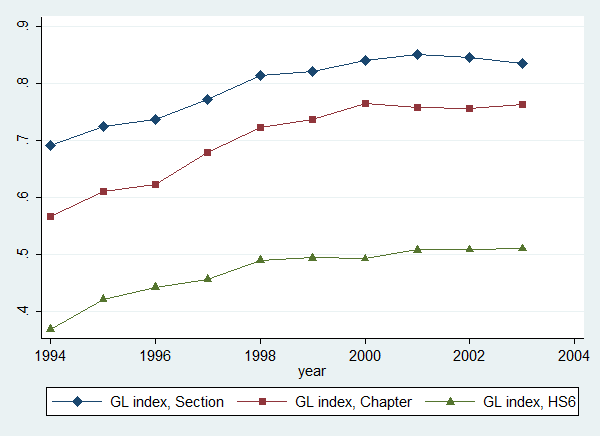

In [31]:
use gl_chapter, replace
joinby year using gl_6_dgt, unm(b)
drop _merge
joinby year using gl_section, unm(b)
drop _merge
save gl, replace

use gl.dta, replace

twoway 	(connected gl_eu_section year, ms(D)) (connected gl_eu_chapter year, ms(S)) /*
    */ (connected gl_eu_hs6 year, ms(T)), legend(rows(1) lab(1 "GL index, Section") lab(2 "GL index, Chapter") lab(3 "GL index, HS6"))/*
    */ xtitle (year) ytitle("")

### Margins of export growth

### Export diversification

## Comparative advantage

### Revealed comparative advantage

### Revealed technology content

### Revealed factor intensities

## Analyzing regional trade

### Regional intensity of trade

### Trade complementarity

## Other important concepts

### Real effective exchange rate

### Terms of trade

### Barter terms of trade

### Income terms of trade

***Open database***

In [ ]:
cd "$input/Chapter1/Datasets"
use GravityData.dta,clear


C:\Users\Iyed\Desktop\Trade Analysis\Practical guide to TPA\Practical guide to TPA\Chapter1\Datasets



***Constructing similarity Index***

In [ ]:
keep ccode pcode year cgdp_c2000 pgdp_c2000
duplicates drop
gen temp1=cgdp_c2000 /(cgdp_c2000 +pgdp_c2000)
ge temp2=pgdp_c2000/(cgdp_c2000 +pgdp_c2000 )
gen simil_index=1-temp1^2-temp2^2
keep  ccode pcode year simil_index
keep if year==2004
keep if ccode=="DEU"
sort ccode pcode year
save similarity_index_i_j.dta,replace
sum simil_index




Duplicates in terms of all variables

(3690716 observations deleted)


***Open 2004 (hs6) trade data of Germany, reshape and modify it for future use***

In [ ]:
use germany_trade_2004_hs6.dta,replace
ren reporter ccode
ren partner pcode
drop nomen
replace flow_name = "Exports" if flow_name=="Gross Exp."
replace flow_name = "Imports" if flow_name=="Gross Imp."
g a = trim(product)
drop product
ren a product
drop if product=="Total"
keep if length(product)>=6
drop rownum
reshape wide trade_value, i(ccode pcode year product) j(flow_name) string
save overlap_temp, replace

***Construct Overlap Trade and merge it with similarity index***

In [ ]:
use overlap_temp, replace
bysort pcode product: gen gl_i_j_k = 1- (abs( trade_valueExports- trade_valueImports) / ( trade_valueExports+ trade_valueImports))
replace gl_i_j_k = 0 if missing(gl_i_j_k)
bysort pcode: egen x1 = total(trade_valueExports)
bysort pcode: egen x2 = total(trade_valueImports)
g denom = x1+x2
bysort pcode: egen dd = max(denom) 
bysort pcode: egen x11 = total(trade_valueExports) if gl_i_j_k > 0
bysort pcode: egen x22 = total(trade_valueImports) if gl_i_j_k > 0
g numer = x11+x22	
bysort pcode: egen nn = max(numer)
g overlap = nn/dd
keep  ccode pcode year overlap
joinby ccode pcode year using similarity_index_i_j, unmatched(both) _merge(_merge)
duplicates drop
save overlap.dta, replace

***Graph Overlap Trade and Country Similarity Index***

In [ ]:
use overlap, replace

twoway 	(scatter  overlap simil_index, mlabel(pcode))/*
*/	(lfit  overlap simil_index),/*
*/	legend(lab(1 "Share of overlap trade")) xtitle (""Similarity index")

In [ ]:
	twoway 	(scatter  overlap simil_index, mlabel(pcode))								/*
		*/	(qfit  overlap simil_index),												/*
		*/	legend(lab(1 "Share of overlap trade")) xtitle (""Similarity index")
		cd "$input/Chapter1/Applications/Other applications/Results"
		graph export "figure_1.2.eps", as(eps) preview(on) replace

perhaps a heatmap ?? or countour